In [1]:
# Import all required
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from types import SimpleNamespace
plt.style.use(["science", "ieee"])
from gic.model.oml import OceanModel
from gic.model.cables import Cable, TheoriticalSolver
from gic.model.utils import RecursiveNamespace, frexp102str
from gic.validation.simulate_synB_synT import SytheticCableAnalysis

from scipy.stats import pearsonr
%matplotlib inline

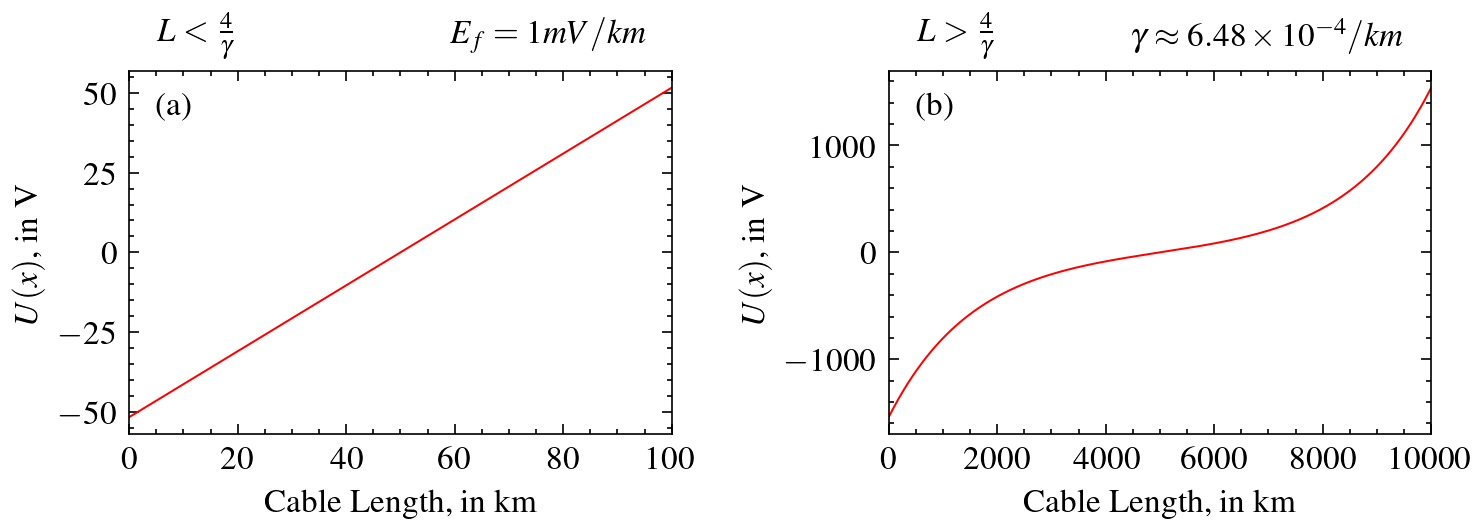

In [2]:
# Short Cable
ths = TheoriticalSolver(6.48e-4, 100., 1.0)
xs, Uxs = ths.calculate_electrically_short()
thl = TheoriticalSolver(6.48e-4, 10000., 1.0)
xl, Uxl = thl.calculate_electrically_long()
fig = plt.figure(dpi=240, figsize=(7,2))
ax = fig.add_subplot(121)
ax.plot(xs, Uxs, "r", lw=0.6, ls="-")
ax.set_xlabel(r"Cable Length, in km")
ax.text(0.05, 1.1, r"$L<\frac{4}{\gamma}$", ha="left", va="center", transform=ax.transAxes)
ax.text(0.95, 1.1, r"$E_f=1 mV/km$", ha="right", va="center", transform=ax.transAxes)
ax.set_ylabel(r"$U(x)$, in V")
ax.text(0.05, 0.9, "(a)", ha="left", va="center", transform=ax.transAxes)
ax.set_xlim(0,100)
#ax.set_ylim(-0.15,0.15)
ax = fig.add_subplot(122)
ax.plot(xl, Uxl, "r", lw=0.6, ls="-")
ax.set_xlabel(r"Cable Length, in km")
ax.set_ylabel(r"$U(x)$, in V")
ax.set_xlim(0,10000)
#ax.set_ylim(-1.6,1.6)
ax.text(0.05, 1.1, r"$L>\frac{4}{\gamma}$", ha="left", va="center", transform=ax.transAxes)
ax.text(0.95, 1.1, r"$\gamma\approx 6.48\times 10^{-4}/km$", ha="right", va="center", transform=ax.transAxes)
ax.text(0.05, 0.9, "(b)", ha="left", va="center", transform=ax.transAxes)
fig.subplots_adjust(wspace=0.4)

2022-07-06 17:29:19.231 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-06 17:29:19.240 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-06 17:29:19.241 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-06 17:29:19.244 | INFO     | gic.model.cables:compile_oml:221 - Synthetic b1c7de30-fd72-11ec-8539-3ba81d28ac9b FT1->OM(FT1)
2022-07-06 17:29:19.245 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-06 17:29:19.249 | INFO     | gic.model.cables:__init__:529 - In nodal analysis for 2 nodes
2022-07-06 17:29:19.249 | INFO     | gic.model.cables:equivalent_nodel_analysis:542 - Eq. nodal analysis.
2022-07-06 17:29:19.250 | INFO     | gic.model.cables:equivalent_nodel_analysis:545 - Node:0
2022-07-06 17:29:19.250 | INFO     | gic.model.cables:equivalent_nodel_analysis:545 - Node:1
2022-07-06 17:29:19.251 | INFO     | gic.model.cable

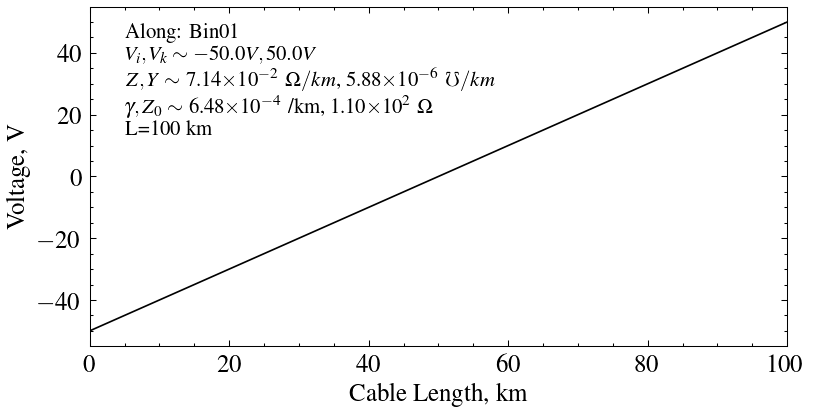

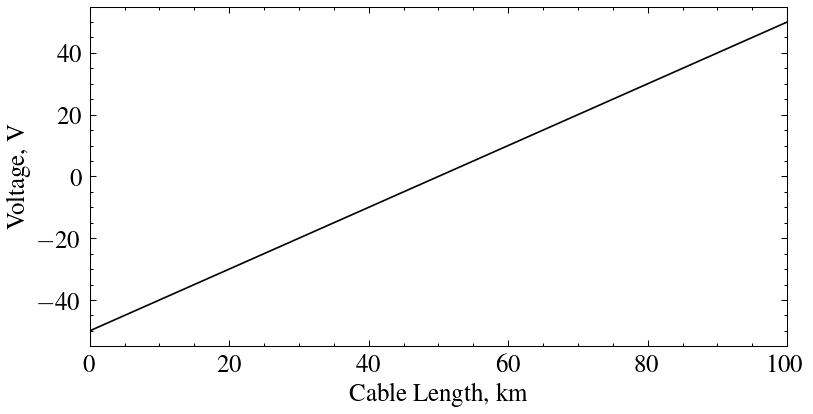

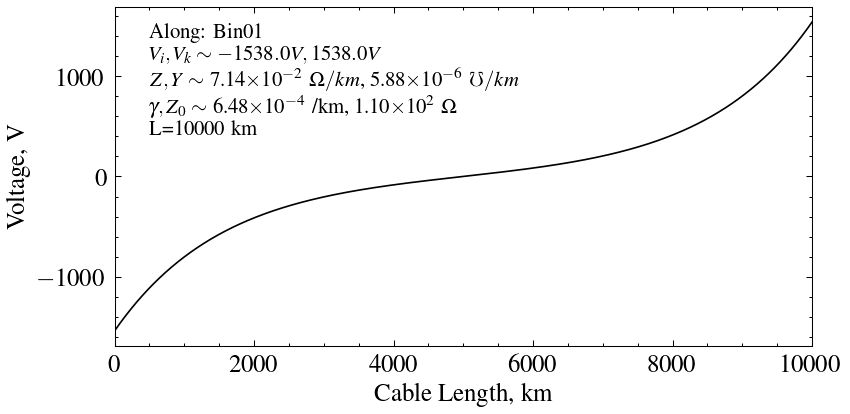

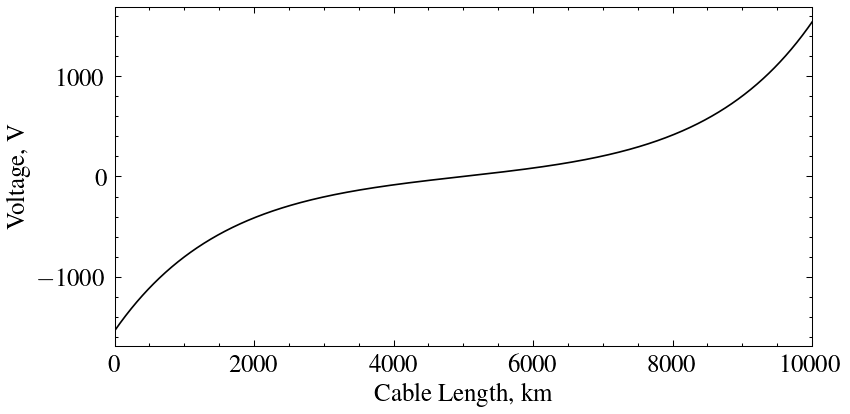

In [3]:
e = pd.DataFrame()
e["X"], e["dTime"] = [1], [0] # inputs is in mV/km
Efields = dict(
    syn = e
)
cab = {
    "cable_sections": [
        {
            "sec_id": 0,
            "directed_length": {
                "ln": 100.
            },
            "elec_params":{
                "earth_model": "FT1",
                "ocean_depth": 4000,
                "ocean_resistivity": 0.3
            }
        }
    ],
    "cable_pot_plot_index": 0
}
cable = RecursiveNamespace(**cab)
txcable_short = Cable(cable, Efields, None, ["X"], "tmp/out/002/")
txcable_short.run_nodal_analysis()


e = pd.DataFrame()
e["X"], e["dTime"] = [1], [0] # inputs is in mV/km
Efields = dict(
    syn = e
)
cab = {
    "cable_sections": [
        {
            "sec_id": 0,
            "directed_length": {
                "ln": 10000.
            },
            "elec_params":{
                "earth_model": "FT1",
                "ocean_depth": 4000,
                "ocean_resistivity": 0.3
            }
        }
    ],
    "cable_pot_plot_index": 0
}
cable = RecursiveNamespace(**cab)
txcable_long = Cable(cable, Efields, None, ["X"], "tmp/out/002/")
txcable_long.run_nodal_analysis()

2022-07-06 17:29:21.112 | INFO     | gic.model.cables:get_voltage_ends_of_cable_section:661 - Max(V) at the end of Section-0(Component-X), -49.98 49.98
2022-07-06 17:29:21.175 | INFO     | gic.model.cables:get_voltage_ends_of_cable_section:661 - Max(V) at the end of Section-0(Component-X), -1538.01 1538.01


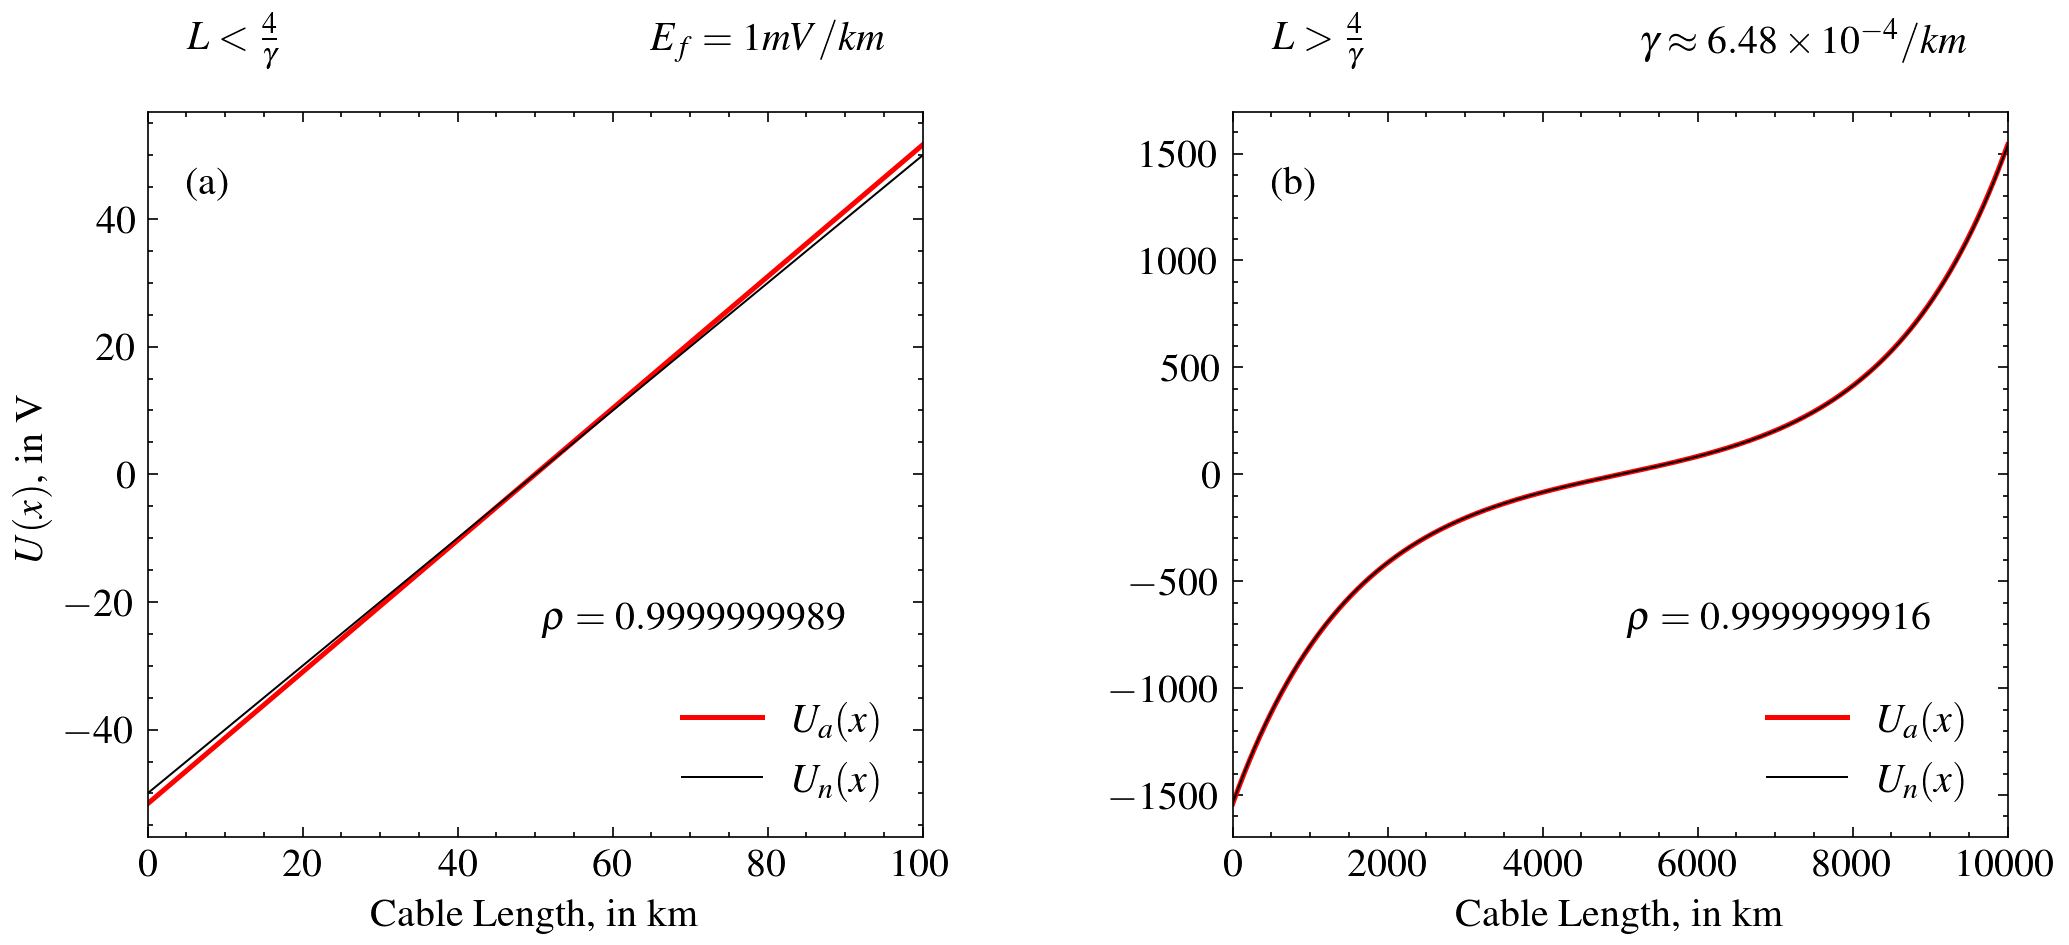

In [4]:
fig = plt.figure(dpi=240, figsize=(10,4))
ax = fig.add_subplot(121)
ax.plot(xs, Uxs, "r", lw=1.5, ls="-", label=r"$U_a(x)$")
ax.set_xlabel(r"Cable Length, in km")
ax.text(0.05, 1.1, r"$L<\frac{4}{\gamma}$", ha="left", va="center", transform=ax.transAxes)
ax.text(0.95, 1.1, r"$E_f=1 mV/km$", ha="right", va="center", transform=ax.transAxes)
ax.set_ylabel(r"$U(x)$, in V")
ax.text(0.05, 0.9, "(a)", ha="left", va="center", transform=ax.transAxes)
ax.set_xlim(0,100)
U0, U1 = txcable_short.nodal_analysis.get_voltage_ends_of_cable_section(
                0, txcable_short.components[0]
            )
U0, U1 = U0[0], U1[0]
V, Lx = txcable_short.tx_lines[0].calculate_potential_along_cable_section(U0, U1)
r, _= pearsonr(V, Uxs[::10])
ax.text(0.9, 0.3, r"$\rho=%.10f$"%r, ha="right", va="center", transform=ax.transAxes)
ax.plot(Lx, V, "k", lw=0.6, ls="-", label=r"$U_n(x)$")
ax.legend(loc=4)
#ax.set_ylim(-0.15,0.15)
ax = fig.add_subplot(122)
ax.plot(xl, Uxl, "r", lw=1.5, ls="-", label=r"$U_a(x)$")
ax.set_xlabel(r"Cable Length, in km")
#ax.set_ylabel(r"$U(x)$, in V")
ax.set_xlim(0,10000)
#ax.set_ylim(-1.6,1.6)
ax.text(0.05, 1.1, r"$L>\frac{4}{\gamma}$", ha="left", va="center", transform=ax.transAxes)
ax.text(0.95, 1.1, r"$\gamma\approx 6.48\times 10^{-4}/km$", ha="right", va="center", transform=ax.transAxes)
ax.text(0.05, 0.9, "(b)", ha="left", va="center", transform=ax.transAxes)
U0, U1 = txcable_long.nodal_analysis.get_voltage_ends_of_cable_section(
                0, txcable_long.components[0]
            )
U0, U1 = U0[0], U1[0]
V, Lx = txcable_long.tx_lines[0].calculate_potential_along_cable_section(U0, U1)
r, _= pearsonr(V, Uxl[::10])
ax.text(0.9, 0.3, r"$\rho=%.10f$"%r, ha="right", va="center", transform=ax.transAxes)
ax.plot(Lx, V, "k", lw=0.6, ls="-", label=r"$U_n(x)$")
ax.legend(loc=4)
fig.subplots_adjust(wspace=0.4)